In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("C:/Users/Admin/Desktop/Sharvari/Internship/EDA_Titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

# Univariate Analysis (Single Variable)

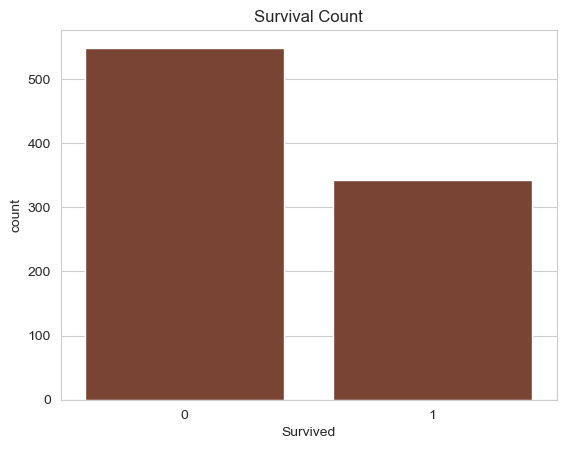

In [93]:
# Survival Count
sns.countplot(x="Survived", data=df, color="#863D28")
plt.title("Survival Count")
plt.show()

Observation: More passengers did not survive compared to those who survived.

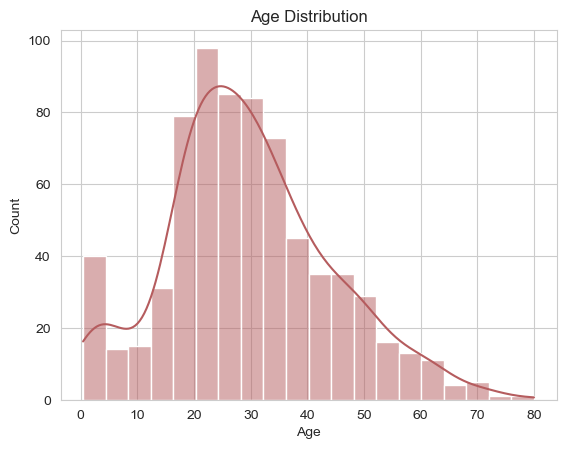

In [99]:
# Age Histogram
sns.histplot(df["Age"], kde=True, color='#B55C5E')
plt.title("Age Distribution")
plt.show()

Observation: Most passengers were between 20–40 years.

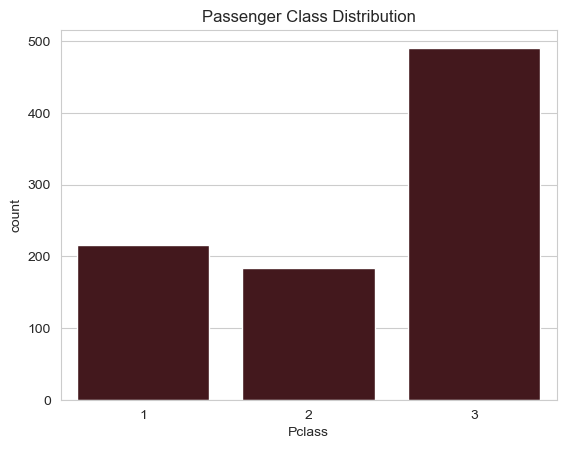

In [97]:
# Passenger Class
sns.countplot(x="Pclass", data=df, color='#4A1117')
plt.title("Passenger Class Distribution")
plt.show()

Observation: Most passengers were in 3rd class.

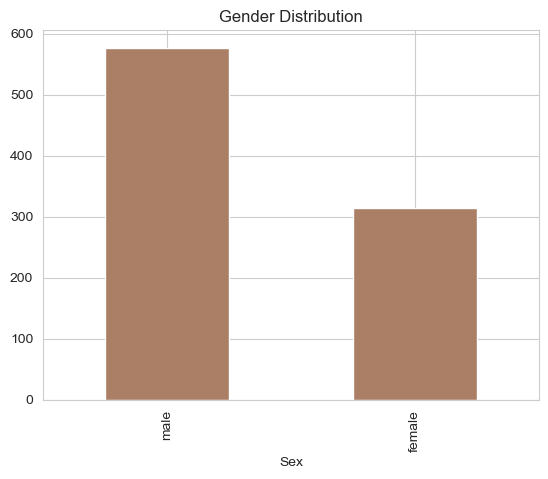

In [101]:
# Categorical variables
df['Sex'].value_counts().plot(kind='bar', color='#AA7F66')
plt.title("Gender Distribution")
plt.show()

Observation: Most passengers were male

# Bivariate Analysis (Two Variables)

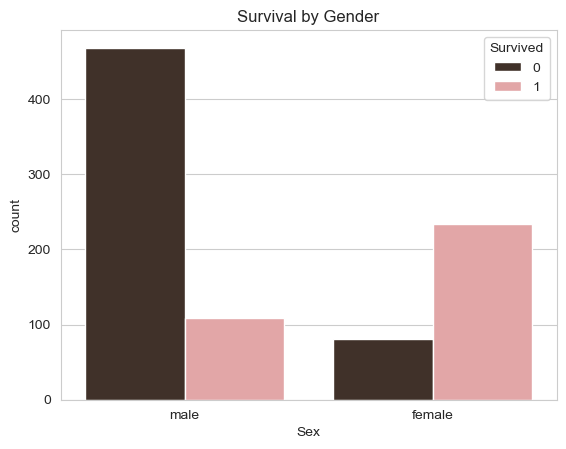

In [65]:
# Survival vs Gender
sns.countplot(x="Sex", hue="Survived", data=df, palette=["#443025", "#EC9C9D"])
plt.title("Survival by Gender")
plt.show()

Observation: Females had higher survival rate than males.

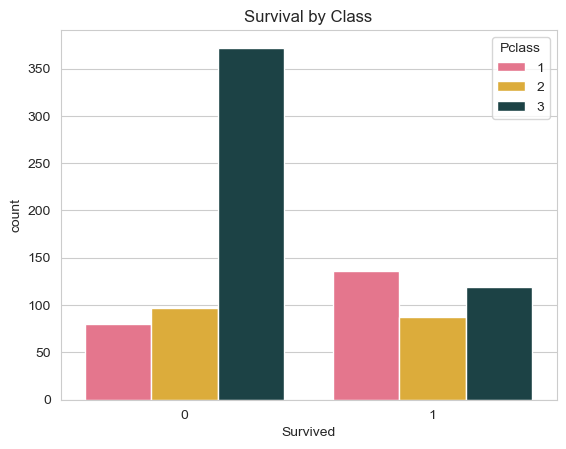

In [75]:
# Survival vs Pclass
sns.countplot(x='Survived', hue='Pclass', data=df, palette=['#F66483', '#F7B720', '#15484C'])
plt.title("Survival by Class")
plt.show()

Observation: 
1st class passengers survived more than 3rd class. 
More people died from 3rd class than 1st class.

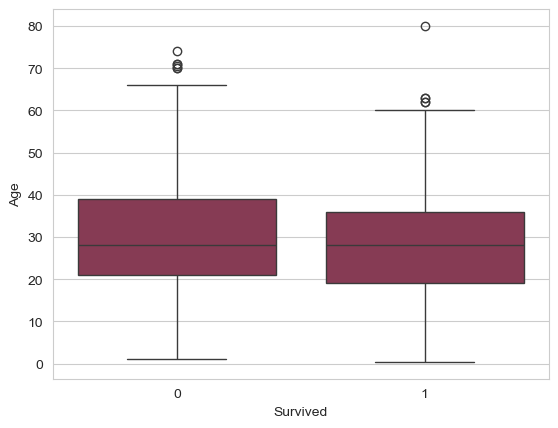

In [76]:
# Age vs Survival
sns.boxplot(x="Survived", y="Age", data=df, color= '#932E50')
plt.show()

Observation: Younger passengers had slightly higher survival.

# Multivariate Analysis

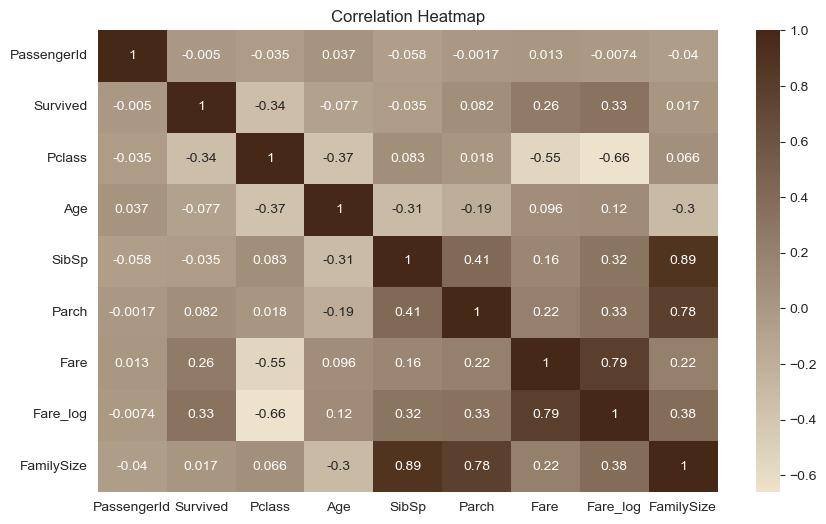

In [90]:
# Correlation Heatmap
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_map",
    ["#EDE2CC", "#452815"]
)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=custom_cmap)
plt.title("Correlation Heatmap")
plt.show()
#670626 AND #BAD797

Observation:

Pclass negatively correlated with Survival.

Fare positively correlated with Survival.

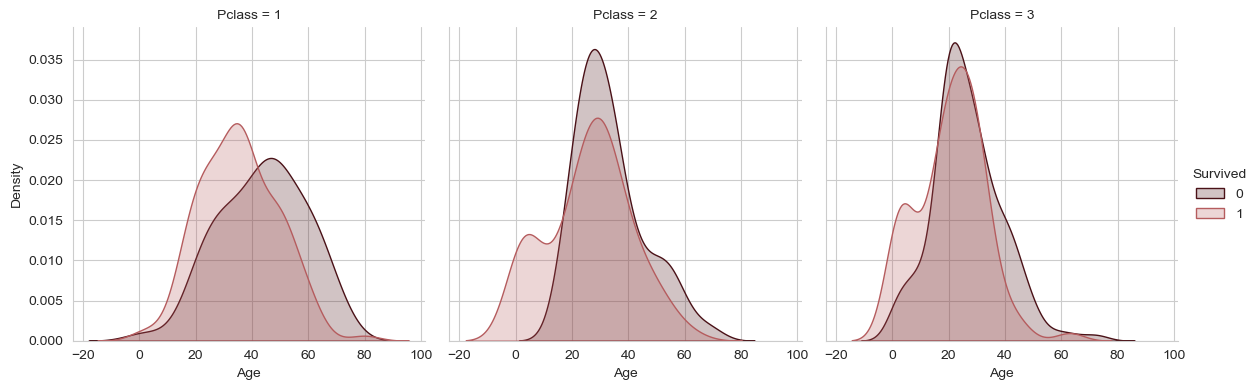

In [81]:
# FacetGrid – Survival by Gender Across Classes
g = sns.FacetGrid(df, col="Pclass", hue="Survived", height=4, palette=['#4A1117','#B55C5E'])
g.map(sns.kdeplot, "Age", fill=True)
g.add_legend()
plt.show()

Observation:

In 1st class, survival is high across many age groups.

In 3rd class, most age groups show low survival density.